In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
from sklearn.metrics import r2_score
from scipy.interpolate import make_interp_spline

x = [466,835,951]
y = [0.662,1.17,1.33]

In [13]:
p, cov=np.polyfit(x, y, 1, cov=True)
mymodel = np.poly1d(p)
myline = np.linspace(1, 1024, 1024)
a1 = mymodel.coefficients[0]
a0 = mymodel.coefficients[1]

r2=r2_score(y, mymodel(x))
print("R2=%f"%r2)
# print("the values are %d %7.5f %s" % (x, y, z))
print(mymodel.coefficients)

print(np.sqrt(np.diag(cov)))
print(np.sqrt(np.diag(cov)))
sigma1,sigma0=np.sqrt(np.diag(cov))

R2=1.000000
[0.00137717 0.02020606]
[5.04076193e-07 3.92487548e-04]
[5.04076193e-07 3.92487548e-04]


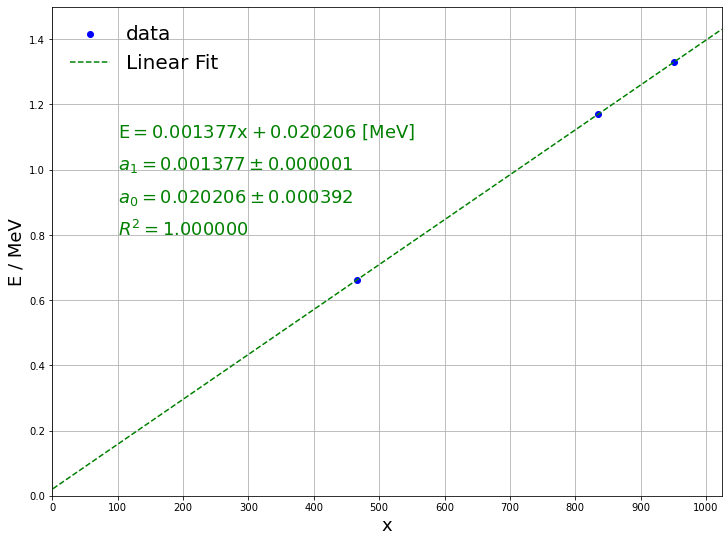

In [22]:
#x_smooth = np.linspace(x.min(), x.max(), 300)
#y_smooth = make_interp_spline(x, y)(x_smooth)


plt.figure(figsize=(12,9))
#plt.title(r"$\rm P_{LD} - I$ Distribution", fontsize=18)
#plt.errorbar(x, y, yerr=y_err,fmt='o', label='data', color='blue', markersize=5, ecolor='blue', capsize=3)
plt.xlabel(r'x', fontsize=18, color="black") 
plt.ylabel(r'E / MeV', fontsize=18, color="black") 
plt.scatter(x, y, color="blue", label='data')
plt.plot(myline, mymodel(myline), color = 'green', linestyle='dashed', label='Linear Fit')
plt.grid(True)
#plt.axis([30, 400, 100, 400])
#plt.figure()
plt.legend(loc=0, frameon=False, fontsize=20)

ax=plt.gca()
x_major_locator=MultipleLocator(100)
y_major_locator=MultipleLocator(0.2)
ax.xaxis.set_major_locator(x_major_locator)
ax.yaxis.set_major_locator(y_major_locator)
plt.xlim(0,1024)
plt.ylim(0,1.5)

plt.text(100, 1.1,r"$\rm E=%fx%+f\ [MeV]$"%(a1,a0), fontsize=18,color="green")
plt.text(100, 1.0, r"$a_1=%f\pm%f$"%(a1,sigma1), fontsize=18,color="green")
plt.text(100, 0.9, r"$a_0=%f\pm%f$"%(a0,sigma0), fontsize=18,color="green")
plt.text(100, 0.8, r"$R^2=%f$"%r2, fontsize=18, color="green")

plt.savefig('./phyex1_fig.pdf')
plt.show()